<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1
---

## Problem Statement

This project compares ACT dn SAT results in the school districts and counties of California over three Accademic Years (2016/17, 2017/18 and 2018/19). The analysis at County and District level addresses San Mateo Union High School Union in understanding the efficacy of its support to students.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**Setup & Importings**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
from IPython.display import display_html
#Thanks to @gibbone on StackOverflow for styling tips

In [19]:
def custom_pallete(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

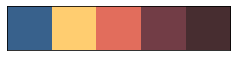

In [59]:
acqua = ["#E4F3E0","#B5DEC8","#9CC7B0","#84B099","#CFB384","#F7BF7D","#CA8D89","#8959B9","#973276"]
contrast =["#38618C", "#FFCD70", "#E26D5C", '#723D46', '#472D30']
custom_pallete(contrast)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).


### Data Sources

This project analysis
is based on the following data sets:

* [`sat_2017_ca.csv`](./data/sat_2017_ca.csv): SAT Scores in California by School - AY 2016-17

* [`sat_2018_ca.csv`](./data/sat_2018_ca.csv): SAT Scores in California by School - AY 2017-18

* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): SAT Scores in California by School - AY 2018-19



* [`income_ca.csv`](./data/income_ca.csv):Per Capita Annual Income per California County in 2018 - Employment Development Department State of California Data

### Outside Research

**California**

University of California has announced a new test for its Admission Process by 2025.
UC decision is part of a wider debate in California: for two times the California Assembly has voted a Bill that would have replaced the California State Assesment Requirement (CAASPP) with SAT in Grade 12, but both times the bill was vetoed by the Governor (frist Brown, more recently Newsom).
Arguments in favour of CAASPP is that it should be less biased towards students from underrepresented social groups. Also, SAT has recently introduced a "Hardship Score" to normalize the diffculties some students have duing their highschool years.

Since 2016-17 some Counties and Districts decided to offer SAT for free to their students [*source*](https://www.documentcloud.org/documents/3914482-California-Districts-Free-College-Entrance2016-17.html).

The project compares participation rate and performace in these Districts with others in California, and in particolare with San Mateo Unionified School District.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [21]:
def mean (n):
    return (sum(n)/len(n))

In [22]:
mean ([1,5,8,10])

6.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [23]:
def stdev (n):
    return (mean([(i - mean(n)) ** 2 for i in n])**0.5)

In [24]:
stdev ([1,5,8,10])

3.391164991562634

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [25]:
def perc_to_float (n):
    if n != 'NaN':
        return (float(n.rstrip("%")))/100

In [26]:
perc_to_float('50.1%')

0.501

--- 
# Part 2
---

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### 1. Import and display data

Read datasets

In [27]:
sat17 = pd.read_csv ('./data/sat_2017_ca.csv')
sat18 = pd.read_csv ('./data/sat_2018_ca.csv')
sat19 = pd.read_csv ('./data/sat_2019_ca.csv')
income = pd.read_csv ('./data/income_ca.csv')

I proceed then to print the first 5 rows of each dataframe, and annotate the number of columns for each one.

- sat17 : 20 columns
- sat18 : 21 columns
- sat19 : 26 columns


- income: 2 columns

I expect to have to drop some columns in the next steps, to have a unique uniform dataframe at the end of the cleaning phase.

In [28]:
sat17.head(5)

,cds,Ccode,CDcode,Scode,rtype,sname,dname,cname,enroll12,NumTstTakr,NumCurrElaBenchmark,NumPreElaBenchmark,TotNumElaBenchmark,PctElaBenchmark,NumCurrMathBenchmark,NumPreMathBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark
0,0.000000e+00,0,0,0,X,NaN,NaN,NaN,484169,221433,144893,15103,159996,72.25,98504,13887,112391,50.76,107173,48.4
1,1.000000e+12,1,100000,0,C,NaN,NaN,Alameda,16638,9029,5407,1376,6783,75.12,4033,1337,5370,59.48,5147,57.01
2,1.100170e+12,1,110017,0,D,NaN,Alameda County Office of Education,Alameda,253,83,28,0,28,33.73,9,0,9,10.84,9,10.84
3,1.100170e+12,1,110017,112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,81,83,28,0,28,33.73,9,0,9,10.84,9,10.84
4,1.611190e+12,1,161119,0,D,NaN,Alameda Unified,Alameda,910,495,373,51,424,85.66,298,47,345,69.7,330,66.67


In [29]:
sat18.head(5)

,cds,Ccode,CDcode,Scode,rtype,sname,dname,cname,enroll12,NumTstTakr,...,NumPreElaBenchmark,TotNumElaBenchmark,PctElaBenchmark,NumCurrMathBenchmark,NumPreMathBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark,year
0,0.000000e+00,0,0,0,X,NaN,NaN,NaN,489221,236492,...,442,167998,71.04,119412,423,119835,50.67,114161,48.27,2017-18
1,1.000000e+12,1,100000,0,C,NaN,NaN,Alameda,17476,10058,...,44,7738,76.93,6160,44,6204,61.68,5981,59.47,2017-18
2,1.100170e+12,1,110017,0,D,NaN,Alameda County Office of Education,Alameda,249,90,...,0,46,51.11,20,0,20,22.22,17,18.89,2017-18
3,1.100170e+12,1,110017,112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,...,0,44,50,19,0,19,21.59,16,18.18,2017-18
4,1.100170e+12,1,110017,136101,S,Connecting Waters Charter - East Bay,Alameda County Office of Education,Alameda,0,2,...,*,*,*,*,*,*,*,*,*,2017-18


In [30]:
sat19.head(5)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [31]:
income.head(5)

,cname,income
0,Alameda,76644
1,Alpine,73307
2,Amador,44793
3,Butte,44346
4,Calaveras,49893


### 2. Missing Values

I proceed visualizing the missing values for each dataframe, using missingo library.

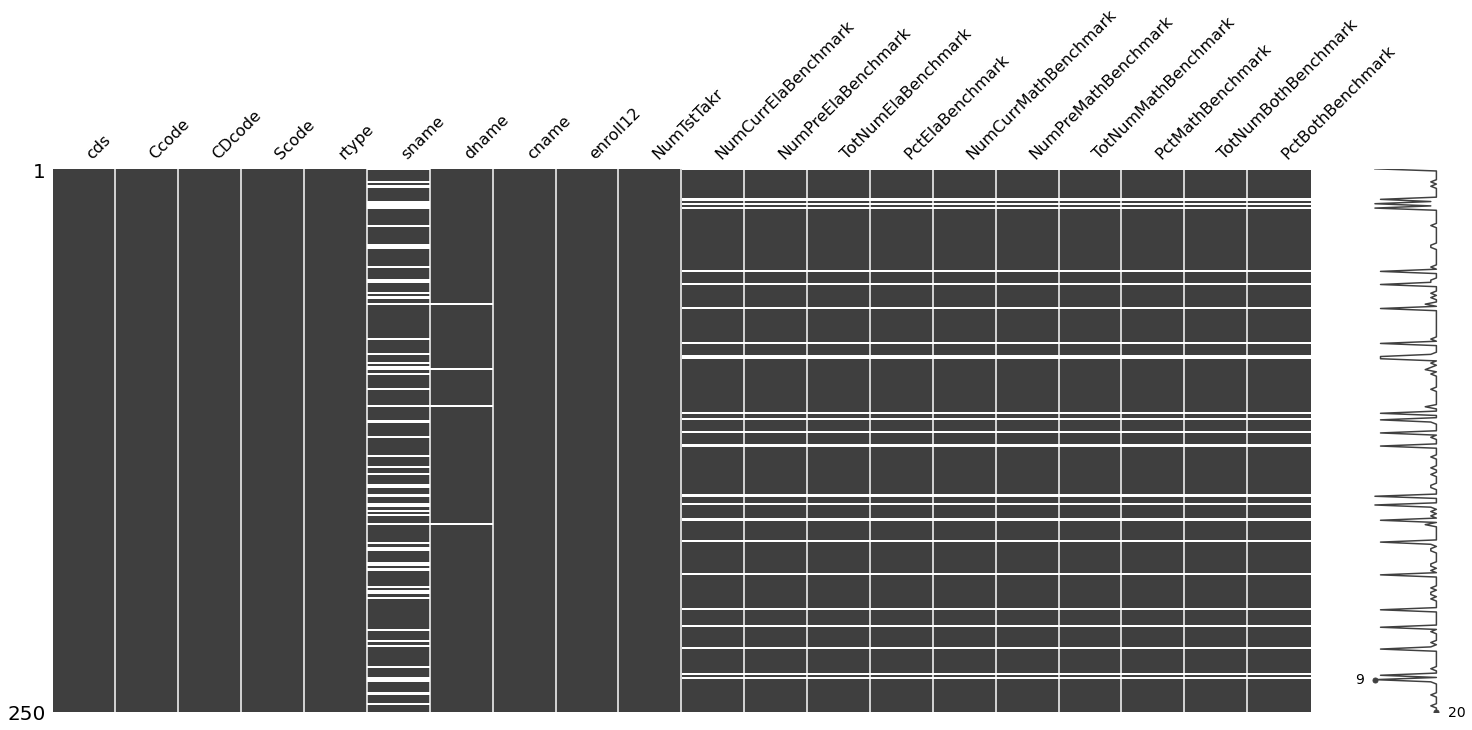

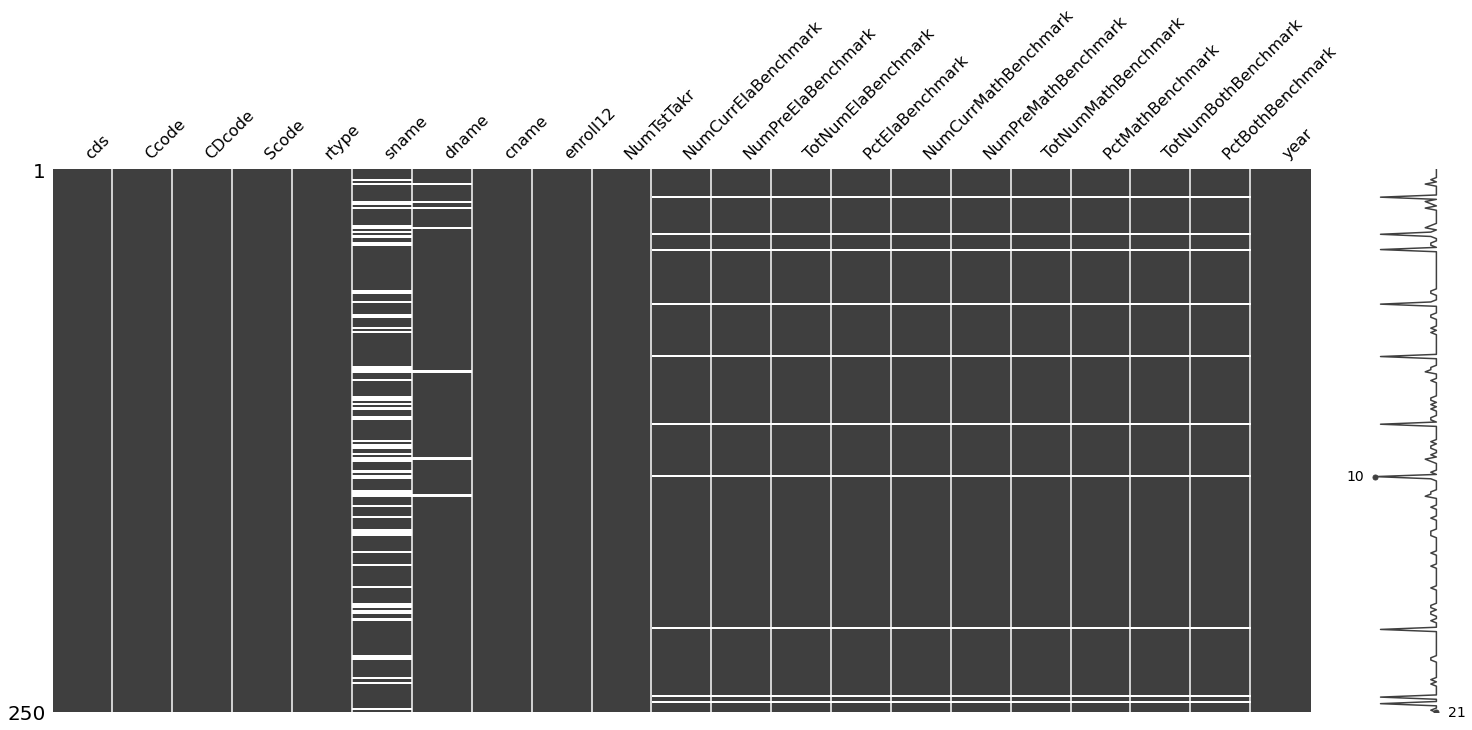

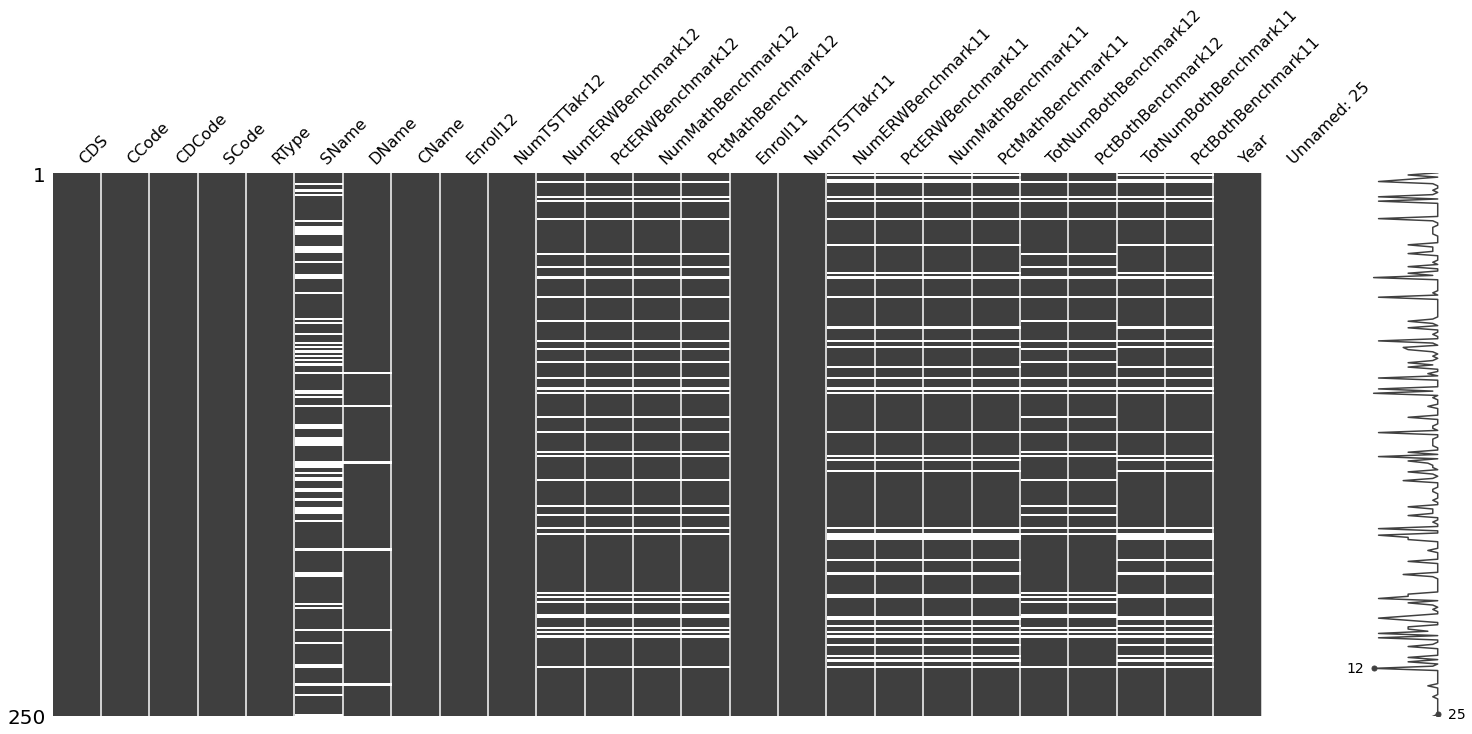

In [32]:
msno.matrix(sat17.sample(250));
msno.matrix(sat18.sample(250));
msno.matrix(sat19.sample(250));
#SAT19 has a Unnamed column empty to be dropped

In [33]:
sat17.isnull().sum(), sat18.isnull().sum() , sat19.isnull().sum() 

(cds                       0
 Ccode                     0
 CDcode                    0
 Scode                     0
 rtype                     0
 sname                   585
 dname                    59
 cname                     1
 enroll12                  0
 NumTstTakr                0
 NumCurrElaBenchmark     179
 NumPreElaBenchmark      179
 TotNumElaBenchmark      179
 PctElaBenchmark         179
 NumCurrMathBenchmark    179
 NumPreMathBenchmark     179
 TotNumMathBenchmark     179
 PctMathBenchmark        179
 TotNumBothBenchmark     179
 PctBothBenchmark        179
 dtype: int64,
 cds                       0
 Ccode                     0
 CDcode                    0
 Scode                     0
 rtype                     0
 sname                   593
 dname                    59
 cname                     1
 enroll12                  0
 NumTstTakr                0
 NumCurrElaBenchmark     165
 NumPreElaBenchmark      165
 TotNumElaBenchmark      165
 PctElaBenchmark         165

I notice from data documentation that the missing values in `sname` and `dname` are due to the fact that this datasets include data at county, district and school level: all the data about district and county do not present `sname` (school name) and all county level data do not have a `dname` (district name). 

Also, to respect students privacy, all schools or districts that reported information on fewer than 14 students, are indicated by `*`, and when no students would take an sat would leave the cell empty (179 in 2017, 165 in 2018 and 311 in 2019).

I decide to turn all `*` into `NaN` to be able to change dtype and properly visualize data. 

Overall I decide to not drop any of these records.

I proceed to perform the following actions:

- `sat17` add the accademic year column;

- `sat19` presents one row and one column entirely null, that I will now proceed to drop.

In [34]:
#transform "*" in NaN
sat17 = sat17.replace('*', np.NaN)
sat18 = sat18.replace('*', np.NaN)
sat19 = sat19.replace('*', np.NaN)

In [35]:
sat17['year'] = '2016-17'

In [36]:
sat19.dropna(
    axis=0,
    how='all',
    thresh=None,
    subset=None,
    inplace=True
)

In [37]:
sat19= sat19.drop(columns=['Unnamed: 25'])

I decide then to drop columns that are not present in all three dataframes because in the present analysis I will compare data available for each academic year from 2016-17 to 2018-19.

In particular:
- from `sat17` and `sat18` have been dropped the columns about old and current scores calculation, keeping only the aggregate.
- from `sat19` have been dropped the test results of Grade 11

In [38]:
sat17 = sat17.drop(columns = ['NumPreElaBenchmark','NumCurrElaBenchmark', 'NumCurrMathBenchmark', 'NumPreMathBenchmark'])
sat18 = sat18.drop(columns = ['NumPreElaBenchmark','NumCurrElaBenchmark', 'NumCurrMathBenchmark', 'NumPreMathBenchmark'])
sat19 = sat19.drop(columns=['Enroll11','NumTSTTakr11','NumERWBenchmark11','PctERWBenchmark11', 'NumMathBenchmark11', 'PctMathBenchmark11', 'TotNumBothBenchmark11','PctBothBenchmark11'])

### 3. Datatypes

I verify datatypes and notice that:
- some numeric features are still interpreted as objects;
- id codes features are considered numeric, when they should infact being strings.

I proceed fixing these issues.

In [39]:
sat17.dtypes
sat18.dtypes
sat19.dtypes
#Many columns, due to the '*' are objects, and should be numeric

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12         object
PctERWBenchmark12         object
NumMathBenchmark12        object
PctMathBenchmark12        object
TotNumBothBenchmark12     object
PctBothBenchmark12        object
Year                      object
dtype: object

In [40]:
sat17[['TotNumElaBenchmark','PctElaBenchmark', 'TotNumMathBenchmark', 'PctMathBenchmark', 'TotNumBothBenchmark','PctBothBenchmark']]= sat17[['TotNumElaBenchmark','PctElaBenchmark', 'TotNumMathBenchmark', 'PctMathBenchmark', 'TotNumBothBenchmark','PctBothBenchmark']].apply(pd.to_numeric)
sat18[['TotNumElaBenchmark','PctElaBenchmark', 'TotNumMathBenchmark', 'PctMathBenchmark', 'TotNumBothBenchmark','PctBothBenchmark']]= sat18[['TotNumElaBenchmark','PctElaBenchmark', 'TotNumMathBenchmark', 'PctMathBenchmark', 'TotNumBothBenchmark','PctBothBenchmark']].apply(pd.to_numeric)
sat19[['NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12', 'PctMathBenchmark12', 'TotNumBothBenchmark12', 'PctBothBenchmark12', 'PctBothBenchmark12']]= sat19[['NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12', 'PctMathBenchmark12', 'TotNumBothBenchmark12', 'PctBothBenchmark12', 'PctBothBenchmark12']].apply(pd.to_numeric)
sat17[['cds','Ccode', 'CDcode','Scode']]= sat17[['cds','Ccode', 'CDcode','Scode']].to_string
sat18[['cds','Ccode', 'CDcode','Scode']]= sat18[['cds','Ccode', 'CDcode','Scode']].to_string
sat19[['CDS','CCode', 'CDCode','SCode']]= sat19[['CDS','CCode', 'CDCode','SCode']].to_string

### 4. Column Labels

I uniform the column labels using a the function below:

In [41]:
def columns_format(old_col):
    """Takes an input string assuming is Camel Case
        and returns it as a all lower caps snake string"""
    if old_col[0].isupper():
        if len(old_col)>6:
            new_col = [a.lower() for a in re.findall(r'[A-Z](?:[A-Z]*(?![a-z])|[a-z]*)', old_col) if a]
            return '_'.join(new_col)
        else:
            return old_col.lower()
    elif(old_col[0].islower()):
        return old_col


Also, I notice that some column names are different (minor labeling issues) across the three dataframes. To solve this I create a list of column names from `sat19` and apply it to the other two `sat` dataframes.

In [42]:
sat19 = sat19.rename(columns=columns_format)
sat18 = sat18.rename(columns=columns_format)
sat_labels = list(sat19)
sat17.columns= sat_labels
sat18.columns= sat_labels

### 5. Merge SAT Data Frames

Having cleaned and uniformed the `sat` datasets, I proceed now concatenate them.

In [46]:
satdfs = [sat17, sat18, sat19]
sat = pd.concat(satdfs)
sat.to_csv('./data/sat_ca.csv', index=False)

I notice that after concatenate the dataframes two dtypes are still objects instead of numeric. I fix them below:

In [ ]:
sat['enroll'] = sat['enroll'].astype(int)
sat['num_tst_takr'] = sat['num_tst_takr'].astype(int)

### 6. Creating data subsects

To perform further analysis, I create two data substes, filtering informations at county and district level, and storing the subsects in variables to have them easily accessible in the analysis phase.

In [47]:
county = sat.loc[(sat.rtype == 'C')]
district = sat.loc[(sat.rtype == 'D')]

For each data subsect I drop empty columns that in the general dataset store more granular information (for `county`: school and district; for `district`: school).

In [48]:
county.dropna(
    axis=1,
    how='all',
    thresh=None,
    subset=None,
    inplace=True
)
county.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)


district.dropna(
    axis=1,
    how='all',
    thresh=None,
    subset=None,
    inplace=True
)
district.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

<ipython-input-48-1a9f5bffbac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county.dropna(
<ipython-input-48-1a9f5bffbac8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county.dropna(
<ipython-input-48-1a9f5bffbac8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district.dropna(
<ipython-input-48-1a9f5bffbac8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

### 7. County income data 

I associate the income data to the county data subsect.

In [27]:
income = pd.read_csv ('./data/income_ca.csv')
county.to_csv('./data/c_sat.csv', index=False)
county_income = pd.merge(county, income, how = 'left', on = ['cname'])
county_income.to_csv('./data/c_sat_income.csv', index=False)
county = pd.read_csv ('./data/c_sat_income.csv')

### 8. Participation Rate

I create and store in a dedicated column the participation rate of students to SAT. 

In [51]:
#calculate and save participation rate in new column
county['pct_tst_takr'] = county.num_tst_takr*100/county.enroll
district['pct_tst_takr'] = district.num_tst_takr*100/district.enroll

<ipython-input-51-b56150000d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['pct_tst_takr'] = county.num_tst_takr*100/county.enroll
<ipython-input-51-b56150000d37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district['pct_tst_takr'] = district.num_tst_takr*100/district.enroll


In [53]:
c2017 = county.loc[(county.year == '2016-17')]
c2018 = county.loc[(county.year == '2017-18')]
c2019 = county.loc[(county.year == '2018-19')]
d2017 = district.loc[(district.year == '2016-17')]
d2018 = district.loc[(district.year == '2017-18')]
d2019 = district.loc[(district.year == '2018-19')]

### 9. Additional features

In my research I found out that some school school Distrits offering SAT for free to students in 12 Grade from 2016-17. I want to compare results with San Mateo Union High to formulate advice on wether to adopt the same policy.

To do so I store the list of counties into a variable `free_list`.

In [31]:
free = pd.read_csv('./data/free_sat.csv')
free = free.values.tolist()
free_list = [j for i in free for j in i]
free_list

['Alvord Unified',
 'Chino Valley Unified',
 'Compton Unified',
 'Covina-Valley Unified',
 'El Monte Union High',
 'Fresno Unified',
 'Hemet Unified',
 'Long Beach Unified',
 'Lynwood Unified',
 'Montebello Unified',
 'Moreno Valley Unified',
 'Norwalk-La Mirada Unified',
 'Oakland Unified',
 'Orange Unified',
 'Paramount Unified',
 'Redlands Unified',
 'Rialto Unified',
 'San Jose Unified',
 'Tustin Unified',
 'Twin Rivers Unified',
 'Val Verde Unified',
 'West Contra Costa Unified',
 'San Mateo']

### 10. Data Dictionary

Having consolidated and collected all features and data I want to analyze, I proceed filling up the data dictionary.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**cds**|*object*|SAT|County/District/School Code|
|**ccode**|*object*|SAT|County Code|
|**cdcode**|*object*|SAT|District Code|
|**scode**|*object*|SAT|School Code|
|**rtype**|*object*|SAT|Record type; used for filtering for County District and School|
|**sname**|*object*|SAT|School Name|
|**dname**|*object*|SAT/free_sat|District Name|
|**cname**|*object*|SAT|County Name|
|**income**|*object*|SAT|Per Capita Annual Income in 2018|
|**year**|*object*|SAT|Test Administration Academic Year|
|**enroll**|*int64*|SAT|Enrollment of Grade 12|
|**num_tst_takr**|*int64*|SAT|Number of Test Takers of Grade 12|
|**pct_tst_takr**|*int64*|SAT|Percentage of Test Takers of Grade 12|
|**avg_scr_eng**|*float64*|SAT|The number of students meeting the Evidence-Based Reading & Writing (ERW) |
|**pct_erw_benchmark**|*float64*|SAT|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW)|
|**num_math_benchmark**|*float64*|SAT|The number of students who met or exceeded the benchmark for SAT Math test|
|**pct_math_benchmark**|*float64*|SAT|The percent of students who met or exceeded the benchmark for SAT Math test|
|**tot_num_both_benchmark**|*float64*|SAT|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math|
|**pct_both_benchmark**|*float64*|SAT|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math|

## Exploratory Data Analysis

### 1. Summary Statistics

Mean and Median of SAT test results in California Counties grouped by Year

In [32]:
#SAT Mean
county[['year','pct_erw_benchmark','pct_math_benchmark', 'pct_both_benchmark']].groupby('year').mean()

,pct_erw_benchmark,pct_math_benchmark,pct_both_benchmark
year,,,
2016-17,79.104107,56.015000,53.800893
2017-18,76.076786,54.833214,52.242679
2018-19,74.402545,52.194727,49.723091


In [33]:
#SAT Median
county[['year', 'pct_erw_benchmark','pct_math_benchmark', 'pct_both_benchmark']].groupby('year').median()

,pct_erw_benchmark,pct_math_benchmark,pct_both_benchmark
year,,,
2016-17,79.73,56.875,54.495
2017-18,76.79,57.725,54.750
2018-19,75.39,53.210,50.690


Mean and median describe an overall negative trend in SAT performances over the three years analyzed. Also, we can see that English Reading and Writing registeres higher scores than Math, but the negative trend described is equally affecting both sections of SAT.

In [34]:
#Standard Deviation Dictionary
sd = {col:stdev(county[col]) for col in county.select_dtypes(exclude= ['object'])}
sd

{'enroll': 17595.395846962205,
 'num_tst_takr': 8794.939196209492,
 'num_erw_benchmark': 5784.699169835548,
 'pct_erw_benchmark': 9.848848575972582,
 'num_math_benchmark': 3938.580249005353,
 'pct_math_benchmark': 12.953997291081523,
 'tot_num_both_benchmark': 3732.2025361544097,
 'pct_both_benchmark': 13.052044176443625,
 'income': 22341.739565354448,
 'pct_tst_takr': 11.560247177277825}

#### 1. Which *counties* have the highest and lowest **participation rates** for SAT ?

In [35]:
top2017 = c2017[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).head(5)
top2018 = c2018[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).head(5)
top2019 = c2019[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).head(5)
top2017_styler = top2017.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2016-17')
top2018_styler = top2018.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2017-18')
top2019_styler = top2019.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2018-19')
display_html(top2017_styler._repr_html_()+top2018_styler._repr_html_()+top2019_styler._repr_html_(), raw=True)

,pct_tst_takr
cname,
San Francisco,56.212304
Alameda,54.267340
Los Angeles,53.365763
Santa Clara,53.291675
Fresno,50.956718
,pct_tst_takr
cname,
San Francisco,64.093669
Santa Clara,57.948065


The highest participation rates for SAT change over the years analyzed: even though San Francisco mantains the higher rank, Los Angeles is the only other being in top 5 for all three years. The articipation rate seems overall to decrease ovver the three years. 

In [36]:
bot2017 = c2017[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
bot2018 = c2018[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
bot2019 = c2019[['cname','pct_tst_takr']].groupby('cname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
bot2017_styler = bot2017.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2016-17')
bot2018_styler = bot2018.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2017-18')
bot2019_styler = bot2019.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2018-19')
display_html(bot2017_styler._repr_html_()+bot2018_styler._repr_html_()+bot2019_styler._repr_html_(), raw=True)

,pct_tst_takr
cname,
Del Norte,17.183099
Tehama,16.811594
Nevada,13.425705
Mono,10.660981
Inyo,9.884239
,pct_tst_takr
cname,
Yuba,21.699079
Del Norte,19.329897


The lower participation rates are registered in Inyo, Mono and Nevada. Also we can notice that lower scores remained stable in  the timespan analyzed. 

#### 2. Which  *counties*  perform the highest and lowest in SAT **Math**?

In [37]:
math17 = c2017[['year','pct_math_benchmark']].groupby('year').mean().head(5)
math18 = c2018[['year','pct_math_benchmark']].groupby('year').mean().head(5)
math19 = c2019[['year','pct_math_benchmark']].groupby('year').mean().head(5)
math17_styler = math17.style.set_table_attributes("style='display:inline'").set_caption('Mean Math Performance 2016-17')
math18_styler = math18.style.set_table_attributes("style='display:inline'").set_caption('Mean Math Performance 2017-18')
math19_styler = math19.style.set_table_attributes("style='display:inline'").set_caption('Mean Math Performance 2018-19')
display_html(math17_styler._repr_html_()+math18_styler._repr_html_()+math19_styler._repr_html_(), raw=True)

,pct_math_benchmark
year,
2016-17,56.015000
,pct_math_benchmark
year,
2017-18,54.833214
,pct_math_benchmark
year,
2018-19,52.194727


In [38]:
math17 = c2017[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).head(5)
math18 = c2018[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).head(5)
math19 = c2019[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).head(5)
math17_styler = math17.style.set_table_attributes("style='display:inline'").set_caption('Best Math Performance 2016-17')
math18_styler = math18.style.set_table_attributes("style='display:inline'").set_caption('Best Math Performance 2017-18')
math19_styler = math19.style.set_table_attributes("style='display:inline'").set_caption('Best Math Performance 2018-19')
display_html(math17_styler._repr_html_()+math18_styler._repr_html_()+math19_styler._repr_html_(), raw=True)

,pct_math_benchmark
cname,
El Dorado,81.780000
Shasta,74.170000
Amador,74.040000
Tuolumne,73.390000
Nevada,72.950000
,pct_math_benchmark
cname,
El Dorado,80.890000
San Mateo,72.700000


The highest performances in math are reported in ElDorado county over the all three years.

In [39]:
math17 = c2017[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).tail(5)
math18 = c2018[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).tail(5)
math19 = c2019[['cname','pct_math_benchmark']].groupby('cname').max().sort_values('pct_math_benchmark', ascending=False).tail(5)
math17_styler = math17.style.set_table_attributes("style='display:inline'").set_caption('Worse Math Performance 2016-17')
math18_styler = math18.style.set_table_attributes("style='display:inline'").set_caption('Worse Math Performance 2017-18')
math19_styler = math19.style.set_table_attributes("style='display:inline'").set_caption('Worse Math Performance 2018-19')
display_html(math17_styler._repr_html_()+math18_styler._repr_html_()+math19_styler._repr_html_(), raw=True)

,pct_math_benchmark
cname,
Merced,36.080000
Kings,35.970000
Glenn,34.620000
Fresno,34.110000
Madera,31.660000
,pct_math_benchmark
cname,
Glenn,35.400000
Merced,35.110000


The lowest performances variate in the three years analyzed. Glenn and Madera is the only county being in the bottom 5 for all years.

#### 3. Which *counties* have the higher and lower **Pass Rates**?

In [40]:
pass17 = c2017[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass18 = c2018[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass19 = c2019[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass17_styler = pass17.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2016-17')
pass18_styler = pass18.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2017-18')
pass19_styler = pass19.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2018-19')
display_html(pass17_styler._repr_html_()+pass18_styler._repr_html_()+pass19_styler._repr_html_(), raw=True)

,pct_both_benchmark
cname,
El Dorado,79.500000
Nevada,72.600000
Amador,72.120000
Shasta,72.080000
Tuolumne,70.970000
,pct_both_benchmark
cname,
El Dorado,77.420000
Marin,71.590000


El Dorado and Nevada are the only two couties remaining in the top 5 for all three years analyzed. We can notice a high overlap of counties that had the highest math performances and the ones with higher pass rate.

In [41]:
pass17 = c2017[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass18 = c2018[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass19 = c2019[['cname','pct_both_benchmark']].groupby('cname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass17_styler = pass17.style.set_table_attributes("style='display:inline'").set_caption('Lower Pass Rate 2016-17')
pass18_styler = pass18.style.set_table_attributes("style='display:inline'").set_caption('Lower Pass Rate 2017-18')
pass19_styler = pass19.style.set_table_attributes("style='display:inline'").set_caption('Lower Pass Rate 2018-19')
display_html(pass17_styler._repr_html_()+pass18_styler._repr_html_()+pass19_styler._repr_html_(), raw=True)

,pct_both_benchmark
cname,
Glenn,34.620000
Kings,33.710000
Merced,33.350000
Fresno,31.980000
Madera,29.090000
,pct_both_benchmark
cname,
Merced,33.110000
Colusa,33.080000


The worse pass rates have been registered in Madera and Merced, that for all three years poitioned in the bottom five. 

#### 4. Which *district* have the higher and lower **Pass Rates**?

In [42]:
pass17 = d2017[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass18 = d2018[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass19 = d2019[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).head(5)
pass17_styler = pass17.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2016-17')
pass18_styler = pass18.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2017-18')
pass19_styler = pass19.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2018-19')
display_html(pass17_styler._repr_html_()+pass18_styler._repr_html_()+pass19_styler._repr_html_(), raw=True)

,pct_both_benchmark
dname,
Palo Alto Unified,94.760000
San Marino Unified,94.230000
Los Gatos-Saratoga Joint Union High,93.500000
Santa Cruz County Office of Education,91.550000
Fremont Union High,91.390000
,pct_both_benchmark
dname,
Santa Cruz County Office of Education,96.050000
San Marino Unified,95.080000


The districs with the highest pass rates are Palo Alto and San Marino that for all three years have been in the top five State wide for pass rate at SAT.

In [43]:
pass17 = d2017[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass18 = d2018[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass19 = d2019[['dname','pct_both_benchmark']].groupby('dname').max().sort_values('pct_both_benchmark', ascending=False).tail(5)
pass17_styler = pass17.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2016-17')
pass18_styler = pass18.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2017-18')
pass19_styler = pass19.style.set_table_attributes("style='display:inline'").set_caption('Higher Pass Rate 2018-19')
display_html(pass17_styler._repr_html_()+pass18_styler._repr_html_()+pass19_styler._repr_html_(), raw=True)

,pct_both_benchmark
dname,
San Diego County Office of Education,5.880000
Compton Unified,4.940000
Golden Plains Unified,4.760000
SBE - Lifeline Education Charter,2.940000
Inyo County Office of Education,0.000000
,pct_both_benchmark
dname,
Firebaugh-Las Deltas Unified,9.640000
Compton Unified,8.050000


The lower pass rate have been registered in Inyo County Office of Education, where in 2 out of three years the pass rate has been 0. Also San Diego Office of Education over three years hit a 5% pass rate only once in 2016-17, to then decline to 0% in 2017-18 and 2018-19.

#### 4.  Which *districts* have the highest and lowest **participation rates** for SAT ? 

In [44]:
pr2017 = d2017[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).head(5)
pr2018 = d2018[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).head(5)
pr2019 = d2019[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).head(5)
pr2017_styler = pr2017.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2016-17')
pr2018_styler = pr2018.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2017-18')
pr2019_styler = pr2019.style.set_table_attributes("style='display:inline'").set_caption('Top Student Rate Participation 2018-19')
display_html(pr2017_styler._repr_html_()+pr2018_styler._repr_html_()+pr2019_styler._repr_html_(), raw=True)

,pct_tst_takr
dname,
Hawthorne,100.757576
Lawndale Elementary,100.000000
SBE - Academia Avance Charter,97.101449
SBC - High Tech High,93.283582
Covina-Valley Unified,93.136403
,pct_tst_takr
dname,
SBE - Academia Avance Charter,106.818182
Lawndale Elementary,101.739130


It appears that some district have had a mass participation, involving the entire student body. We can notice though that in 2018-19 no district registered the 100% adoption or even 95%.

In [45]:
pr2017 = d2017[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
pr2018 = d2018[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
pr2019 = d2019[['dname','pct_tst_takr']].groupby('dname').max().sort_values('pct_tst_takr', ascending=False).tail(5)
pr2017_styler = pr2017.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2016-17')
pr2018_styler = pr2018.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2017-18')
pr2019_styler = pr2019.style.set_table_attributes("style='display:inline'").set_caption('Lower Student Rate Participation 2018-19')
display_html(pr2017_styler._repr_html_()+pr2018_styler._repr_html_()+pr2019_styler._repr_html_(), raw=True)

,pct_tst_takr
dname,
Spencer Valley Elementary,5.167173
Maricopa Unified,4.533333
Acton-Agua Dulce Unified,4.302477
Inyo County Office of Education,3.399123
San Diego County Office of Education,2.715655
,pct_tst_takr
dname,
Maricopa Unified,5.541562
Riverside County Office of Education,5.541562


The lowest participation rates are registered in Inyo County and San Diego, counties where we have also registered some of the worse performances in the same timespan.

## Visualize the Data

**1. Correlation Matrix for SAT California counties data**

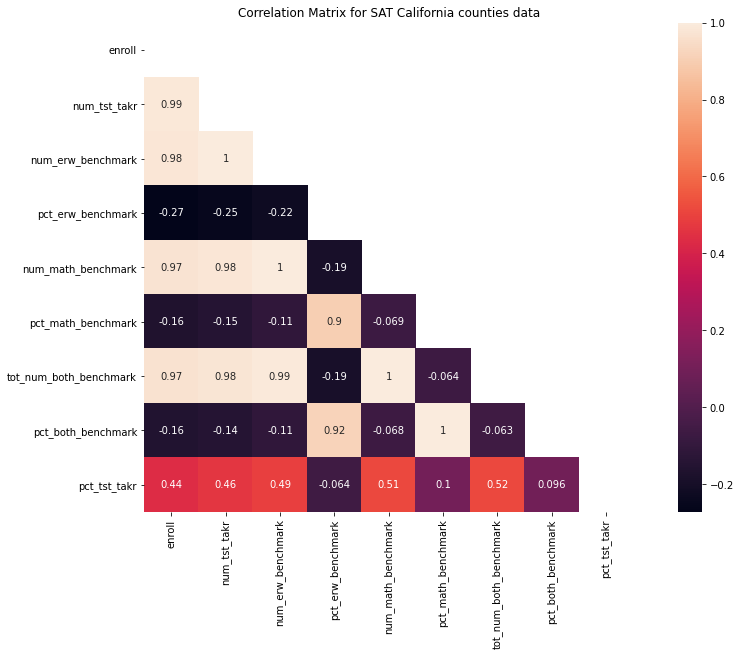

In [60]:
plt.figure(figsize= (16, 9))
# Get correlation of variables.
correlation = county.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(data= correlation,       
            mask= mask,
            square= True,          
            annot = True)
plt.title ('Correlation Matrix for SAT California counties data');     

**2. Visualize the correlation between math performances and overall pass scores**

<ipython-input-57-a6ba060faeae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2019['pct_math_range'] = pd.cut(c2019['pct_math_benchmark'], np.arange(min(num), max(num), step=10))


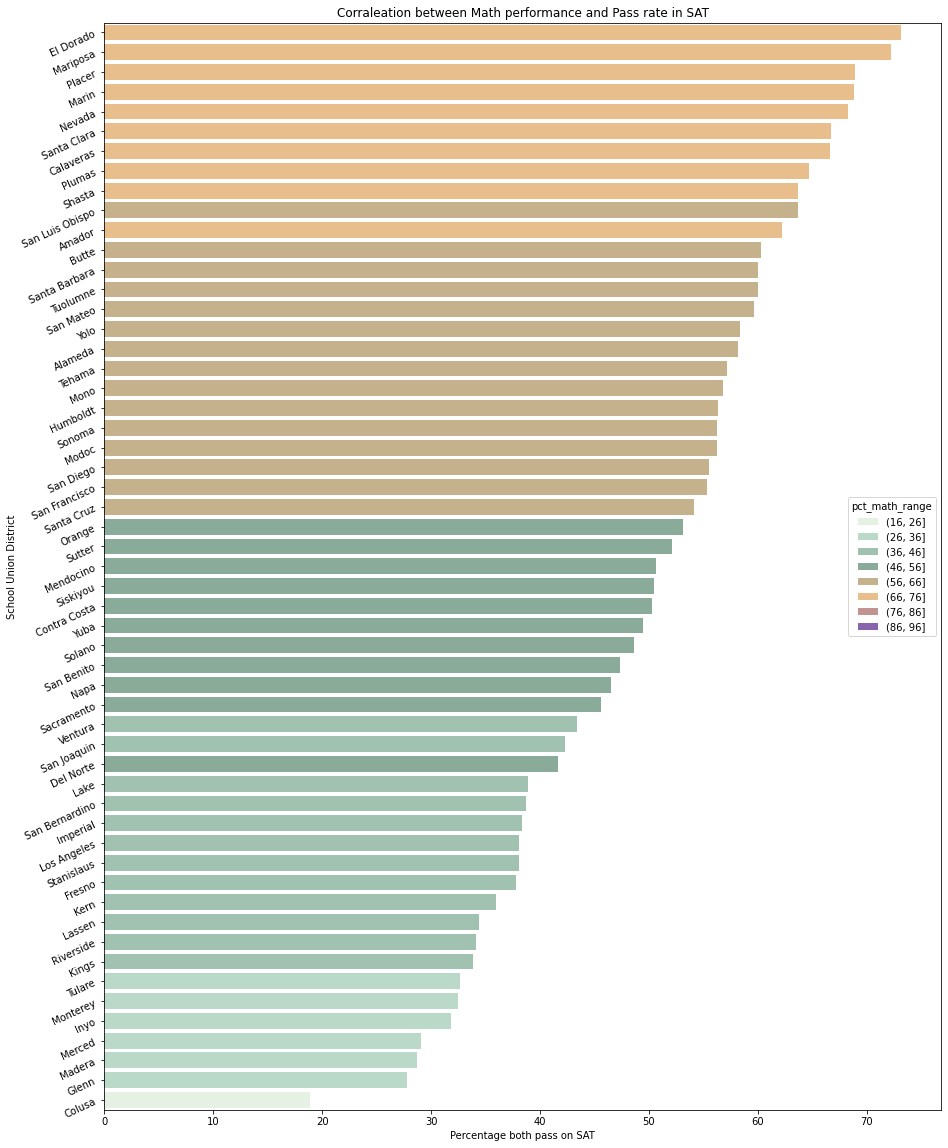

In [57]:
plt.figure(figsize = (15, 20))

order = c2019.groupby('cname')['pct_both_benchmark'].sum().sort_values(ascending=False).index.values
num = np.random.randint(15, 100, size=100)

c2019['pct_math_range'] = pd.cut(c2019['pct_math_benchmark'], np.arange(min(num), max(num), step=10))

sns.barplot(x=c2019['pct_both_benchmark'],
            y=c2019['cname'],
            dodge=False,
            hue= c2019['pct_math_range'],
            order= order);

plt.title ('Corraleation between Math performance and Pass rate in SAT')
plt.yticks(rotation=25)
plt.xlabel ('xlable');
# labels
plt.ylabel('School Union District')
#plt.xticks([])
plt.xlabel('Percentage both pass on SAT');

The barplot shows the high correlation between passing the math test and the all SAT.

**3. Number of students enrolled in G12 taking SAT**

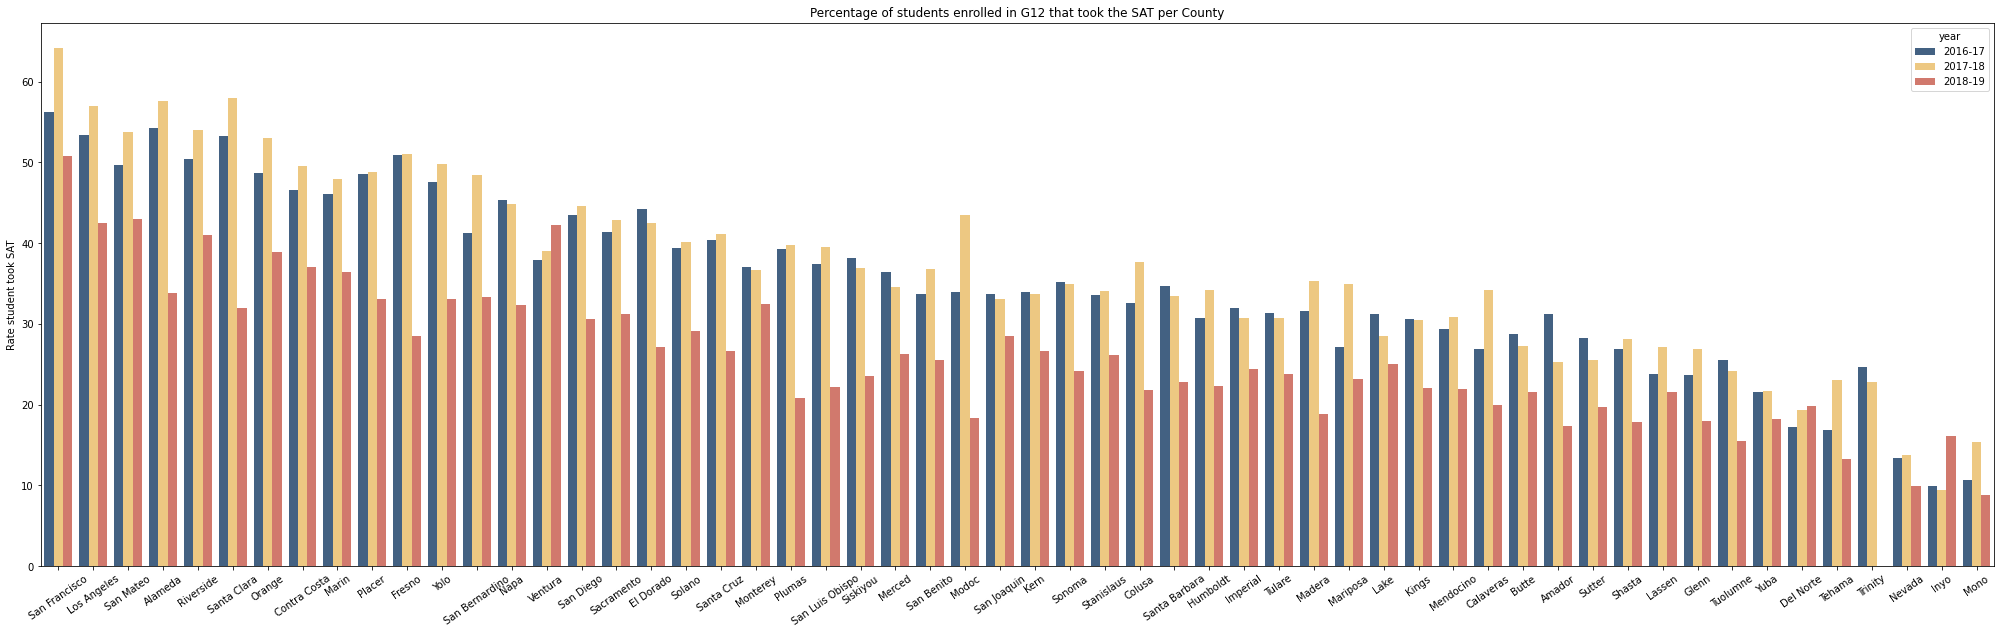

In [49]:
plt.figure(figsize = (35, 10))
order = county.groupby('cname')['pct_tst_takr'].sum().sort_values(ascending=False).index.values
sns.barplot(data=county,
            x='cname',
            hue='year',
            y='pct_tst_takr',
            order= order,
            estimator=np.mean);
plt.title('Percentage of students enrolled in G12 that took the SAT per County')
plt.xlabel('')
plt.xticks()
plt.ylabel('Rate student took SAT');
plt.xticks(rotation=35);

The general trend of students taking SAT in G12, is dscending from the AY 2017-18, with a significant consistent drop in every county in 2018-19.

**4. SAT pass rate of students per county**

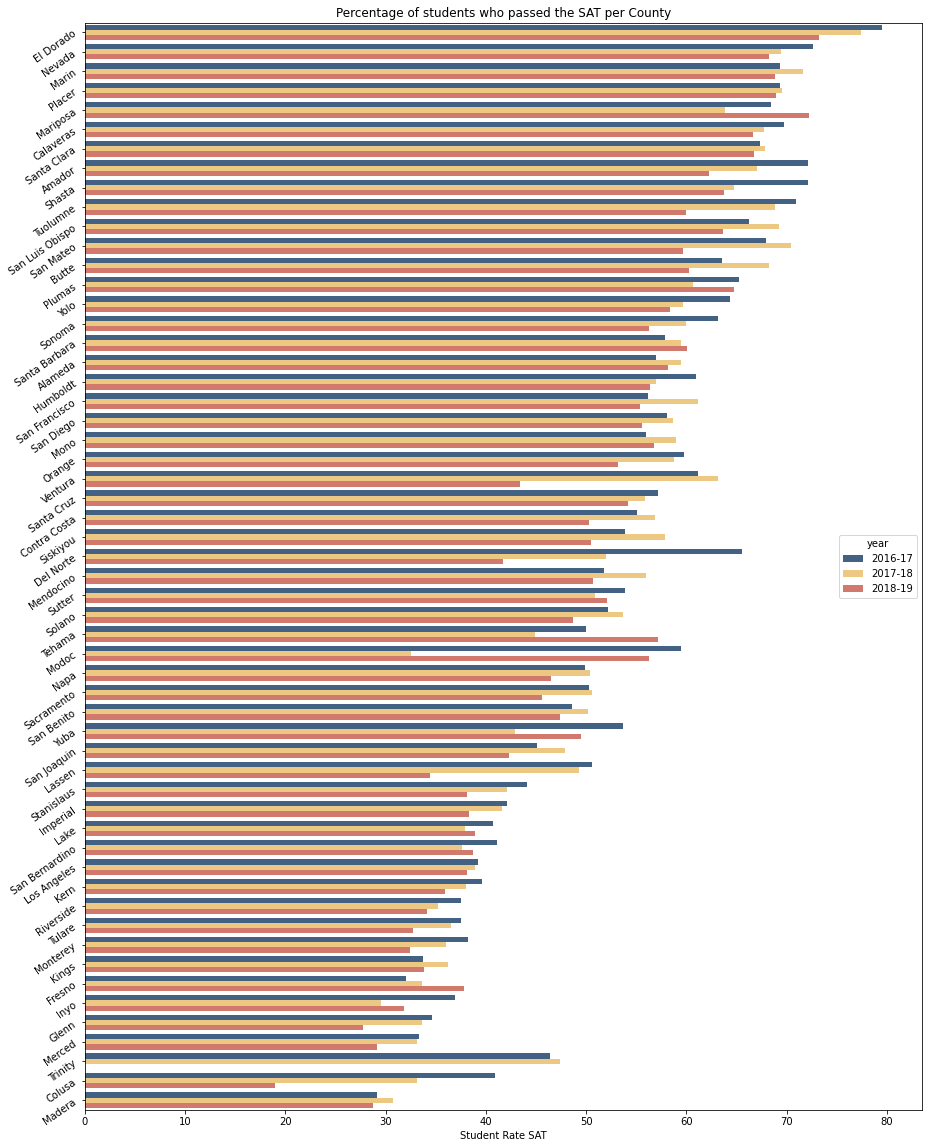

In [50]:
plt.figure(figsize = (15, 20))
order = county.groupby('cname')['pct_both_benchmark'].sum().sort_values(ascending=False).index.values

sns.barplot(data=county,
            y='cname',
            hue='year',
            x='pct_both_benchmark',
            order = order,
            estimator=np.mean);
plt.title('Percentage of students who passed the SAT per County')
plt.ylabel('')
plt.xticks()
plt.xlabel('Student Rate SAT');
plt.yticks(rotation=35);

This graph to show that the performances over three years are pretty much stable for each county.

**5. Percentage of Students who passed SAT**

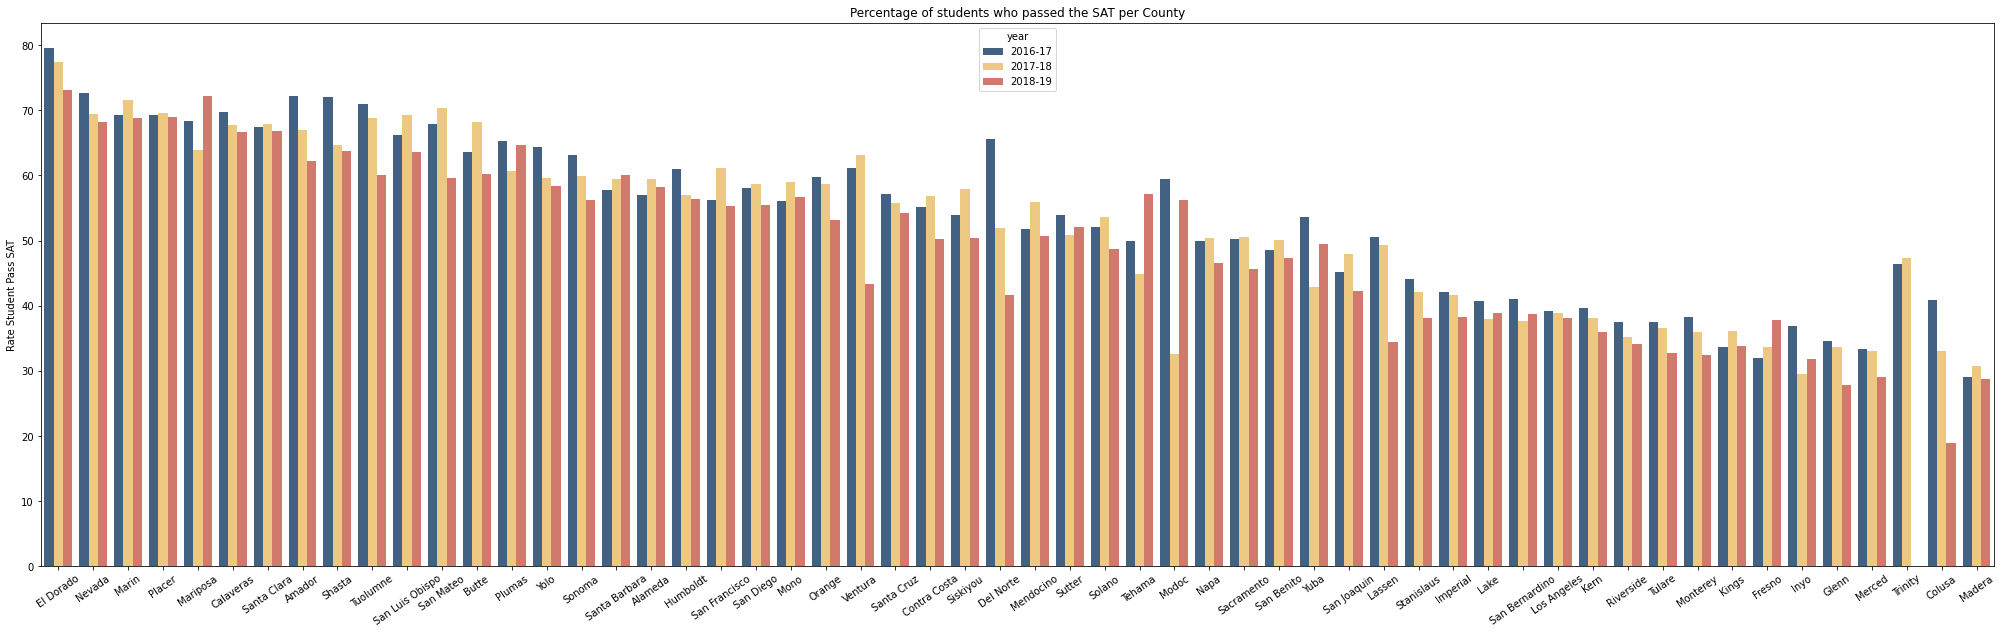

In [51]:
plt.figure(figsize = (35, 10))
order = county.groupby('cname')['pct_both_benchmark'].sum().sort_values(ascending=False).index.values

sns.barplot(data=county,
            x='cname',
            hue='year',
            y='pct_both_benchmark',
            order = order,
            estimator=np.mean);
plt.title('Percentage of students who passed the SAT per County')
plt.xlabel('')
plt.yticks()
plt.ylabel('Rate Student Pass SAT');
plt.xticks(rotation=35);

**6. Visualize the correlation between income and students enrolled in G12 at county level**

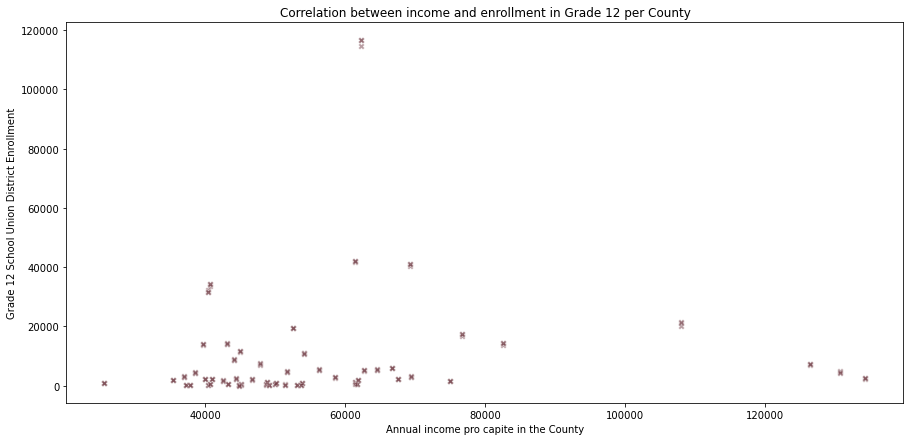

In [52]:
plt.figure(figsize = (15, 7))

# Scatter plot
sns.scatterplot(x = county['income'],
                y = county['enroll'],
                marker = 'X',
                alpha= 0.5,
               color= '#723D46')

#horizontal barplot

# labels
plt.title('Correlation between income and enrollment in Grade 12 per County')
plt.xlabel('Annual income pro capite in the County')
plt.xticks()
plt.ylabel('Grade 12 School Union District Enrollment');

Although a correlation between income and amount of students enrolled in G12 was expected, it is not proven by the graph. It would be interesting to relate the income and the rate of students enrolled in G12, to verify that this result is actually significant.

**7. Rate of Students passing the SAT per County Income in 2017**

<ipython-input-53-eede94ddae1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2017['income_range'] = pd.cut(c2017['income'], np.arange(min(num), max(num), step=20000))


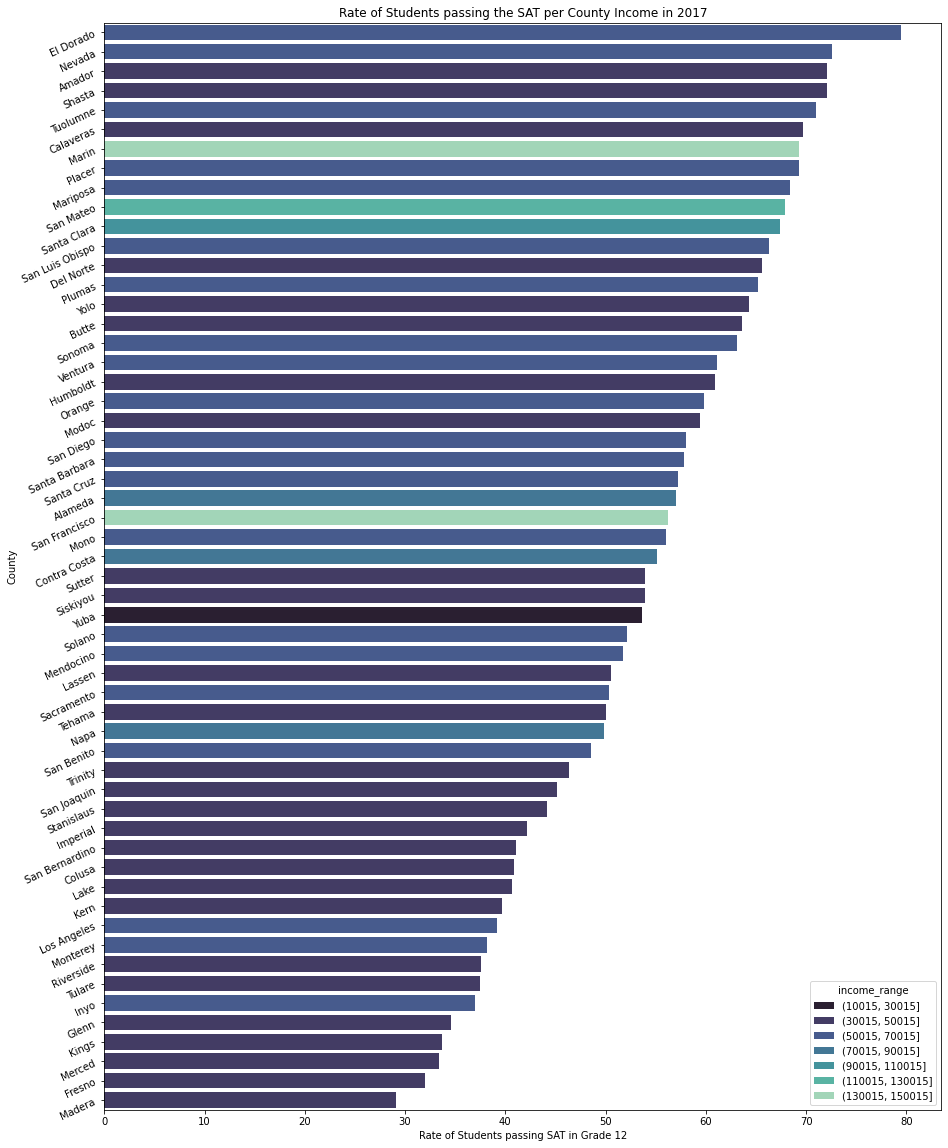

In [53]:
plt.figure(figsize = (15, 20))

order = c2017.groupby('cname')['pct_both_benchmark'].sum().sort_values(ascending=False).index.values
num = np.random.randint(10000, 154300, size=10000)

c2017['income_range'] = pd.cut(c2017['income'], np.arange(min(num), max(num), step=20000))

sns.barplot(x=c2017['pct_both_benchmark'],
            y=c2017['cname'],
            dodge=False,
            hue= c2017['income_range'],
            order= order,
           palette= 'mako');

plt.title ('Rate of Students passing the SAT per County Income in 2017')
plt.yticks(rotation=25)
plt.xlabel ('Rate of Students passing SAT in Grade 12')
plt.ylabel ('County');

Even though it was expected, this data do not prove a correlation between income and performance at SAT at county level in California. Futher analysis could be made to identify oter factors that might influence positively or negatively the performances of students from an environmental perspective.

**8. Participation for District that offer the test for free vs San Mateo**

As this project addresses San MateoUnion High on wether to adopt a *free for all* SAT test policy, the following section presents a series of graphs showing SAT performances in Discricts who adopted the policy vs San Mateo. 

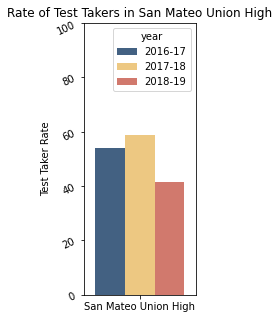

In [54]:
plt.figure(figsize= (2, 5))

san_mateo = district.loc[(district.dname == ('San Mateo Union High'))]

sns.barplot(data=san_mateo,
            y= 'pct_tst_takr',
            x= 'dname',
            hue='year',
           dodge=True);

plt.title ('Rate of Test Takers in San Mateo Union High')
plt.yticks(rotation=25)
plt.xlabel ('')
plt.ylabel ('Test Taker Rate');
plt.ylim(0, 100);

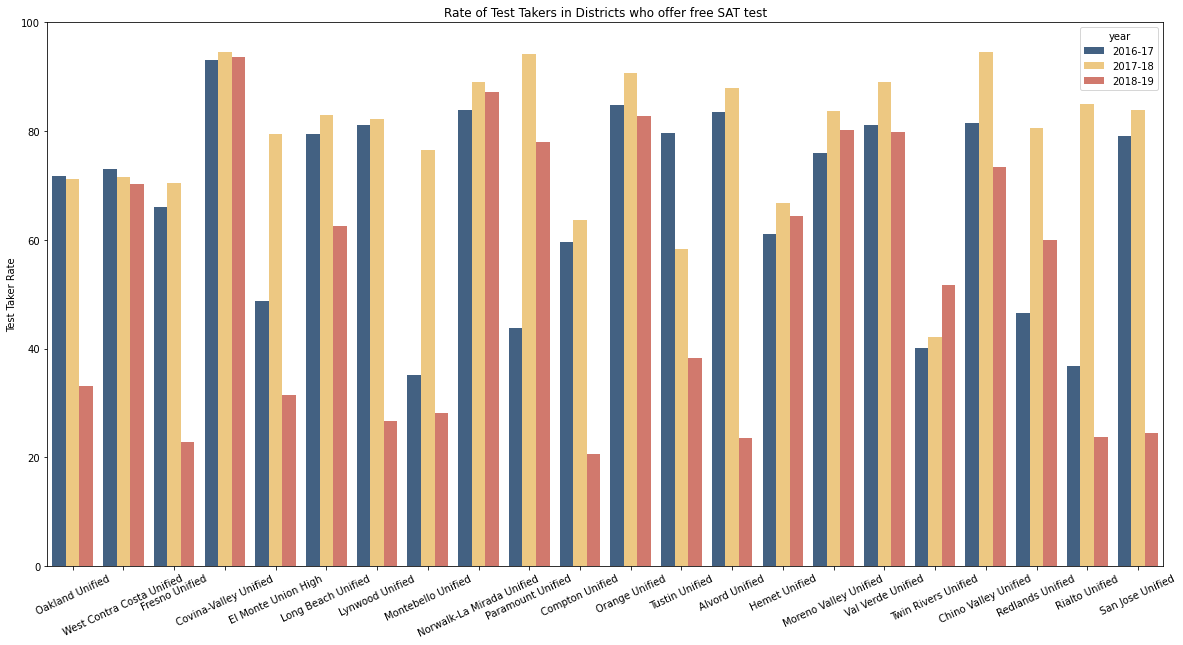

In [55]:
plt.figure(figsize= (20, 10))

free_district = district.loc[(district.dname.isin(free_list))]

sns.barplot(data=free_district,
            y= 'pct_tst_takr',
            x= 'dname',
            hue='year');

plt.title ('Rate of Test Takers in Districts who offer free SAT test')
plt.xlabel ('')
plt.ylabel ('Test Taker Rate');
plt.xticks(rotation=25)
plt.ylim(0, 100);

The participation in San Mateo Union High is between 40 to 60% in the three years examined. Districts offering SAT for free reach peaks of higher participation around year 2, but the increase does not appear to be consistent, dropping almost everywhere in the AY 2018-19.

**9. Performance in SAT in Discricts who offered the test for free vs San Mateo**

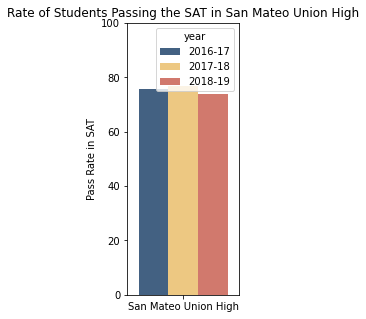

In [56]:
plt.figure(figsize= (2, 5))

san_mateo = district.loc[(district.dname == ('San Mateo Union High'))]

sns.barplot(data=san_mateo,
            y= 'pct_both_benchmark',
            x= 'dname',
            hue='year',
           dodge=True);

plt.title ('Rate of Students Passing the SAT in San Mateo Union High')
plt.xlabel ('')
plt.ylabel ('Pass Rate in SAT')
plt.ylim(0, 100);

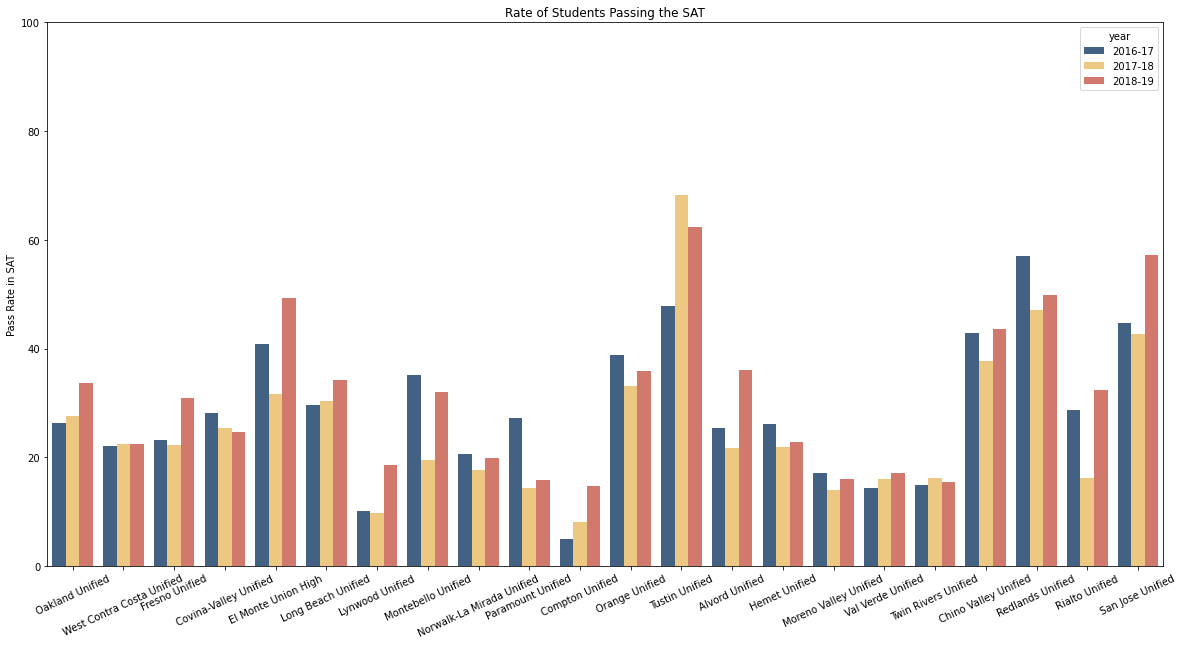

In [57]:
plt.figure(figsize= (20, 10))

free_district = district.loc[(district.dname.isin(free_list))]

sns.barplot(data=free_district,
            y= 'pct_both_benchmark',
            x= 'dname',
            hue='year');

plt.title ('Rate of Students Passing the SAT')
plt.xlabel ('')
plt.ylabel ('Pass Rate in SAT')
plt.ylim(0, 100)
plt.xticks(rotation=25);

About 80% of of students at San Mateo Union High have successfully met the benchmark over the examined period; in the districts offering the SAT for free performances are overall lower, and don't appear to be increasing over time.

**10. Extra**

to investigate further, I plotted the distribution of students taking the test, and of passing scores. The first is normally distributed, the second appears not normally distributed, having two peaks, one around 30% and one a little over 60%, suggesting that there is a divide between counties that would be interesting analyzing more in depth for a future project.

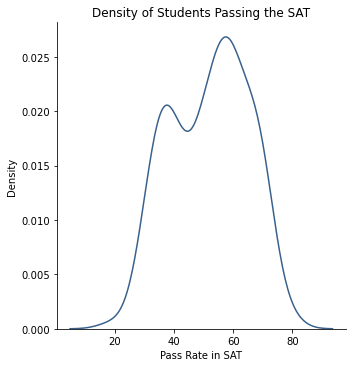

In [61]:
sns.displot(county, x="pct_both_benchmark", kind="kde")

plt.title ('Density of Students Passing the SAT')
plt.xlabel ('Pass Rate in SAT');
#plt.ylabel ('')
#plt.ylim(0, 100)
#plt.xticks(rotation=25);

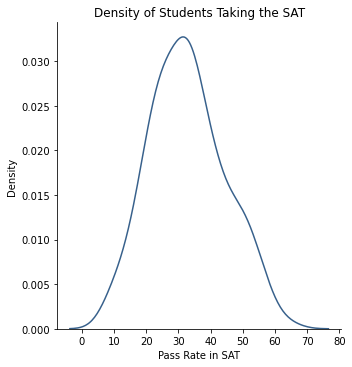

In [63]:
sns.displot(county, x="pct_tst_takr", kind="kde")

plt.title ('Density of Students Taking the SAT')
plt.xlabel ('Pass Rate in SAT');
#plt.ylabel ('')
#plt.ylim(0, 100)
#plt.xticks(rotation=25);

## Conclusions and Recommendations

##### 1. Free SAT is not increasing participation
SAT has been offered for free since 2016 by counties around the State and overall they don't seem to be long term, neither in terms of participation.

##### 2. Free SAT  does not seem to be improving performance
SAT has been offered for free since 2016 by counties around the State and overall they don't seem to be long term, neither in terms of performance.

##### 3. Suggested Action: Math 
SMUH have been performing above average in the State, but strengthening Math skills can significantly improve students success rate in SAT.

